In [18]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [20]:
# Load and Preprocess Data
data = pd.read_csv('train.csv')

In [22]:
# Feature engineering
data = data.assign(
    AgeOfHouse = 2023 - data['YearBuilt'],
    TotalSF = data['GrLivArea'] + data['TotalBsmtSF']
)

In [24]:
# Handle missing values
data = data.fillna({
    'LotFrontage': data['LotFrontage'].median(),
    'MasVnrArea': 0
})

In [26]:
# Select features
features = ['LotArea', 'OverallQual', 'AgeOfHouse', 'TotalSF', 'FullBath', 'GarageCars']
X = data[features]
y = np.log(data['SalePrice'])

In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Normalize features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Build Random Forest Model
rf_reg = RandomForestRegressor(
    n_estimators=200,
    max_depth=8,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

In [34]:
#Train Random Forest Model
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=8, min_samples_split=5, n_estimators=200,
                      n_jobs=-1, random_state=42)

In [38]:
# Generate predictions
y_pred = rf_reg.predict(X_test_scaled)

Sample Price Predictions:
      Actual Price  Predicted Price  Absolute Error  Percentage Error
892       154500.0        139478.65        15021.35              9.72
1105      325000.0        327578.41         2578.41              0.79
413       115000.0        119643.43         4643.43              4.04
522       159000.0        155718.61         3281.39              2.06
1036      315500.0        298022.30        17477.70              5.54
614        75500.0         79966.15         4466.15              5.92
218       311500.0        197798.37       113701.63             36.50
1160      146000.0        154994.40         8994.40              6.16
649        84500.0         79137.30         5362.70              6.35
887       135500.0        138642.54         3142.54              2.32

Overall Performance Metrics:
MAE: $19,814.87
RMSE: $31,324.93
MAPE: 12.08%
R2 Score: 0.8497


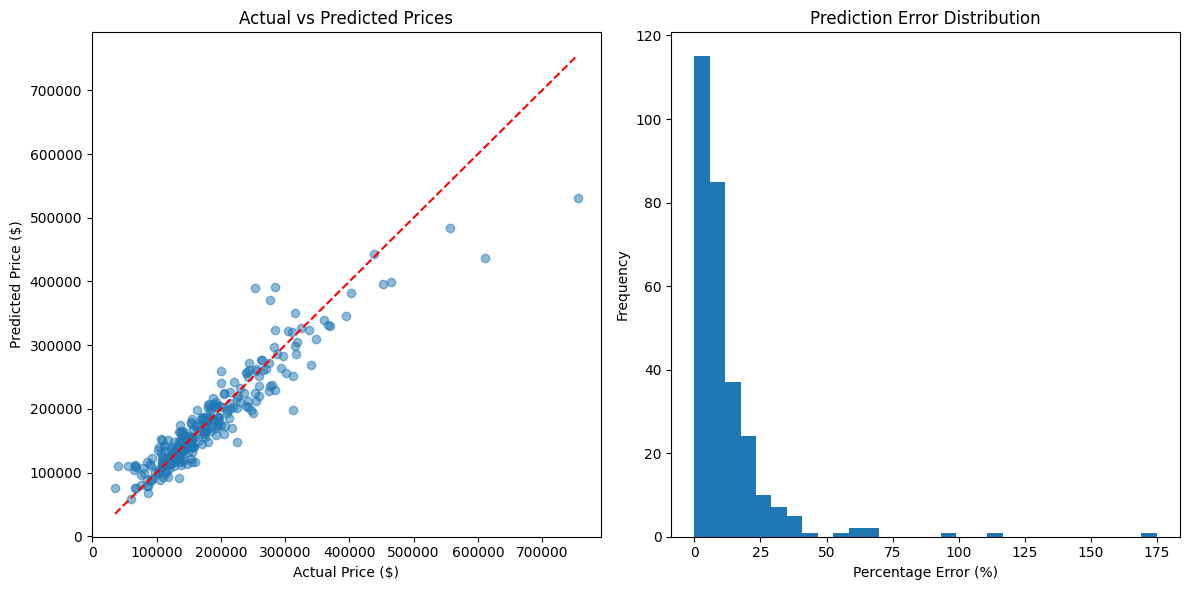

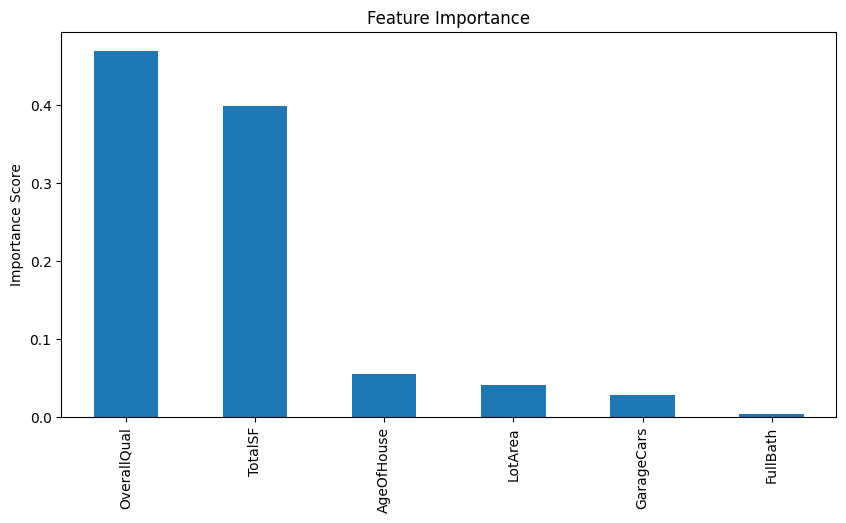

In [44]:
# Convert from log scale back to original price scale
actual_prices = np.exp(y_test)
predicted_prices = np.exp(y_pred)

# Create comparison DataFrame
results_df = pd.DataFrame({
    'Actual Price': actual_prices,
    'Predicted Price': predicted_prices,
    'Absolute Error': np.abs(actual_prices - predicted_prices),
    'Percentage Error': (np.abs(actual_prices - predicted_prices) / actual_prices * 100)
})

# Display first 10 comparisons
print("Sample Price Predictions:")
print(results_df.head(10).round(2))

# Calculate overall metrics
mae = np.mean(results_df['Absolute Error'])
mape = np.mean(results_df['Percentage Error'])
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
r2 = r2_score(y_test, y_pred)

print(f"\nOverall Performance Metrics:")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R2 Score: {r2:.4f}")

# Visualization
plt.figure(figsize=(12, 6))

# Scatter plot of actual vs predicted
plt.subplot(1, 2, 1)
plt.scatter(actual_prices, predicted_prices, alpha=0.5)
plt.plot([actual_prices.min(), actual_prices.max()], 
         [actual_prices.min(), actual_prices.max()], 'r--')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs Predicted Prices')

# Error distribution
plt.subplot(1, 2, 2)
plt.hist(results_df['Percentage Error'], bins=30)
plt.xlabel('Percentage Error (%)')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution')

plt.tight_layout()
plt.show()

# Feature importance analysis
plt.figure(figsize=(10, 5))
feature_imp = pd.Series(rf_reg.feature_importances_, index=features).sort_values(ascending=False)
feature_imp.plot(kind='bar', title='Feature Importance')
plt.ylabel('Importance Score')
plt.show()

In [46]:
# Additional Random Forest Diagnostics
print("\nRandom Forest Specific Metrics:")
print(f"Number of Trees: {rf_reg.n_estimators}")
print(f"OOB Score: {rf_reg.oob_score_:.4f}" if hasattr(rf_reg, 'oob_score_') else "OOB Score not available")


Random Forest Specific Metrics:
Number of Trees: 200
OOB Score not available
